In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
df  = pd.DataFrame(train_df)
df_sub =pd.DataFrame(test_df)
df_sub


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


/var/folders/7s/8csm91nn7fjfpsqn3qnyzlpw0000gn/T/ipykernel_968/1531671194.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesting_df['Sex']= le.fit_transform(interesting_df['Sex'])
/var/folders/7s/8csm91nn7fjfpsqn3qnyzlpw0000gn/T/ipykernel_968/1531671194.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interesting_df['Embarked'] = le.fit_transform(interesting_df['Embarked'])


          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.077221 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.369226  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.093254 -0.114631 -0.245489   
Age      -0.077221 -0.369226  0.093254  1.000000 -0.308247 -0.189119   
SibSp    -0.035322  0.083081 -0.114631 -0.308247  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.189119  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.096067  0.159651  0.216225   
Embarked -0.163517  0.157112  0.104057 -0.025252  0.066654  0.038322   

              Fare  Embarked  
Survived  0.257307 -0.163517  
Pclass   -0.549500  0.157112  
Sex      -0.182333  0.104057  
Age       0.096067 -0.025252  
SibSp     0.159651  0.066654  
Parch     0.216225  0.038322  
Fare      1.000000 -0.221226  
Embarked -0.221226  1.000000  


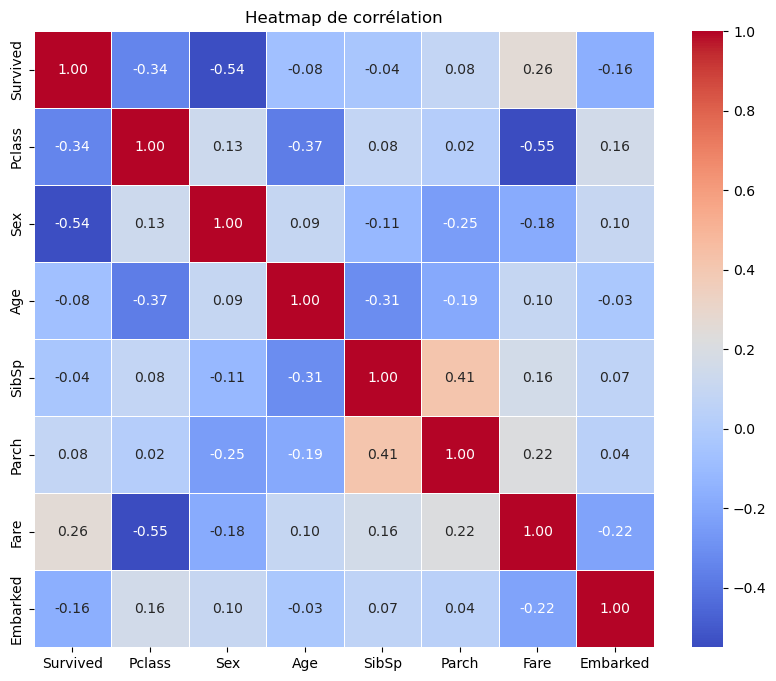

In [14]:
#Analyse de la data:

##Nombre de survivants
'''comptage = df['Survived'].value_counts()
print(comptage)'''

## Nombre d'hommes et de femmes ayant survécu
'''homme_survivant = df[(df['Survived'] ==1) & (df['Sex'] == 'male')]
nb_homme_survivant = homme_survivant.shape[0]

femme_survivant = df[(df['Survived'] ==1) & (df['Sex'] == 'female')]
nb_femme_survivant = femme_survivant.shape[0]

survivors_by_sex = df[df['Survived'] ==1]['Sex'].value_counts()
nb_sex = df['Sex'].value_counts()
pd.DataFrame(survivors_by_sex)
print(survivors_by_sex, nb_sex)'''

##Visualisation de la data:
'''data = df[['Survived','Age']]
data = data.dropna(subset='Age')

age_counts = data.groupby('Age')['Survived'].sum()

plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Âge')
plt.ylabel('Nombre de survivants')
plt.title('Nombre de survivants selon l\'âge')
plt.show()'''

#En fonction des frères et soeurs:
'''data2 = df[['Survived', 'SibSp']]
is_Nan_present = df['SibSp'].isna().any()
sib_survived = data2.groupby('SibSp')['Survived'].sum()
sib_count = df['SibSp'].value_counts()
plt.bar(sib_count.index, sib_count.values, label = 'Nombre de passagers en fonction du nombre de frères et soeurs')
plt.bar(sib_survived.index, sib_survived.values, label = 'Nombre de surivants en fonction nombre de frères et soeurs')
plt.legend()
plt.xlabel('Nombre de frères et soeurs')
plt.ylabel('Nombre de survivants')
plt.show()'''
##Verdict: argument pas très intéressant

#En fonction du nombre de parents:
'''data3 = df[['Survived','Parch']]
parch_survived = data3.groupby('Parch')['Survived'].sum()
parch_count = df['Parch'].value_counts()
plt.bar(parch_count.index, parch_count.values, label = 'Nombre de passagers par nombre de parents')
plt.bar(parch_survived.index, parch_survived.values, label = 'Nombre de survivants en fonction du nb de parents')
plt.legend()
#plt.show()'''
## Verdict : ceux avec Parch ont plus de chances de survivre


'''plt.bar(parch_count.index,parch_count.values)
plt.xlabel('Nombre de parents')
plt.ylabel('Nombre de survivants')'''
#plt.show()

#EN fonction du lieu d'embarquement:
#Nombre de survivants par qu'ai d'embarquement
'''data4 = df[['Survived', 'Embarked']]
is_NaN_embarked = df[df['Embarked'].isna()]
pd.DataFrame(is_NaN_embarked)
print(is_NaN_embarked)
embarked_count = df['Embarked'].value_counts()
embarked_survived = data4.groupby('Embarked')['Survived']
pourcentage_embarked = embarked_survived.mean()*100
plt.bar(pourcentage_embarked.index, pourcentage_embarked.values)
plt.bar(embarked_count.index, embarked_count.values, label = 'Nombre de passagers par quai d embarquement')
plt.bar(embarked_survived.index, embarked_survived.values, label = 'Nombre de passagers ayant survécu par quai d embarquement')
plt.legend()
plt.xlabel('Quai d\'embarquemenet')
plt.ylabel('Nombre de survivants')'''
#plt.show()


#Pourcentage de survivants par quai d'embarquement
'''data5 = df.groupby('Embarked')['Survived']
embarked_pourcentage = data5.mean()*100
plt.bar(embarked_pourcentage.index, embarked_pourcentage.values)
plt.xlabel('Quai')
plt.ylabel('Pourcentage de survivants')
plt.show()''' 
#Pas ouf

#Pourcentage de chance en fonction de la classe:
'''data6= df.groupby('Pclass')['Survived']
Pclass_pourcentage = data6.mean()*100
nb_class = df['Pclass'].value_counts()
plt.bar(nb_class.index, nb_class.values, label ='Nombre de passagers par classe')
plt.bar(Pclass_pourcentage.index, Pclass_pourcentage.values, label = 'Pourcentage de survivants par classe')
plt.legend()
plt.xlabel('Passenger class')
plt.ylabel('Number of survivors')
plt.show()'''
#Archi intéressant: classe 3 le plus de passagers mais le moins de survivants

#Pourcentage de survie en fonction du sexe:
'''data7 = df.groupby('Sex')['Survived']
pourcentage_sexe = data7.mean()*100
pourcentage_sexe = pourcentage_sexe.sort_index()
plt.bar(pourcentage_sexe.index, pourcentage_sexe.values)'''
#Grave intéressant : plus de femmes survivent alors qu'elles sont moins

#Pourcentage de survie en fonction du sexe:
'''data8 = df.groupby('Age')['Survived']
pourcentage_age = data8.mean()*100
plt.bar(pourcentage_age.index, pourcentage_age.values, label = 'Pourcentage de survivants')
plt.xlabel('Age')
plt.ylabel('Pourcentage de survivants')


age_count = df['Age'].value_counts()
age_count = age_count.sort_index()
plt.bar(age_count.index, age_count.values, label = 'Nombre de survivants')
plt.legend()
plt.show()'''
##Verdict : âge pas intéressant

##Matrice de corrélation:
#Prepprocess
le= LabelEncoder()
interesting_columns = ['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
interesting_df = df[interesting_columns]
interesting_df['Sex']= le.fit_transform(interesting_df['Sex'])
interesting_df['Embarked'] = le.fit_transform(interesting_df['Embarked'])
correlation_matrix = interesting_df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap de corrélation")
plt.show()




In [15]:
X = train_df.drop('Survived', axis =1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#pd.DataFrame(X_train)



In [16]:
## 1er test avec juste le sexe:
X_train_subsex = X_train['Sex']

#Encodage de la colonne sex
X_train_encoded = pd.get_dummies(X_train_subsex, drop_first = True)

#Initialisation et ajustment du modèle random Forest
#rf_model = RandomForestClassifier()
rf_model = XGBClassifier()
rf_model.fit(X_train_encoded,y_train)

#Préparation des données de test (X_test)
X_test_subsex = X_test['Sex']
X_test_encoded = pd.get_dummies(X_test_subsex, drop_first=True)

y_pred = rf_model.predict(X_test_encoded)

accuracy = f1_score(y_test, y_pred)
print(accuracy)
X_train_encoded.shape


0.7272727272727273


(712, 1)

In [17]:
##Test avec sexe et âge
X_train_subset_sex_age= X_train[['Sex','Age']].copy()
pd.DataFrame(X_train_subset_sex_age)

#remplissage des valeurs NaN
X_train_subset_sex_age['Age'].fillna(X_train_subset_sex_age['Age'].mean(), inplace=True)


#Encodage des valeurs 'sex'
le= LabelEncoder()
X_train_subset_sex_age['Sex'] = le.fit_transform(X_train_subset_sex_age['Sex'])

#rf = RandomForestClassifier()
rf = XGBClassifier()
rf.fit(X_train_subset_sex_age,y_train)

#Preprocessing de X_test:
X_test_subset_sexage = X_test[['Sex','Age']].copy()
X_test_subset_sexage['Age'].fillna(X_test_subset_sexage['Age'].mean(), inplace = True)
X_test_subset_sexage['Sex'] = le.fit_transform(X_test_subset_sexage['Sex'])

y_pred2= rf.predict(X_test_subset_sexage)
accuracy2 = f1_score(y_pred2, y_test)
print(accuracy2)

##Verdict : pas ouf du tout

0.7172413793103449


In [18]:
#Test avec sexe, nombre de parents, nombre de frères et soeurs
#X_train_subset2 = X_train[['Sex','SibSp','Parch']].copy()
X_train_subset2 = X_train[['Sex','SibSp']].copy()

le= LabelEncoder()
X_train_subset2['Sex'] = le.fit_transform(X_train_subset2['Sex'])
pd.DataFrame(X_train_subset2)

model = XGBClassifier()
model.fit(X_train_subset2, y_train)

#Transformation de X_test
#X_test_subset2 = X_test[['Sex','SibSp','Parch']].copy()
X_test_subset2 = X_test[['Sex','SibSp']].copy()
X_test_subset2['Sex'] = le.fit_transform(X_test_subset2['Sex'])

y_pred22 = model.predict(X_test_subset2)
accuracy22 = f1_score(y_test, y_pred22)
print(accuracy22)

X_test_sub = df_sub[['Sex','SibSp']].copy()
X_test_sub['Sex'] = le.fit_transform(X_test_sub['Sex'])
y_pred_sub = model.predict(X_test_sub)
pd.DataFrame(y_pred_sub)
result_df = pd.DataFrame({'PassengerId' : df_sub['PassengerId'], 'Survived' :y_pred_sub })
result_df.to_csv('predictions_Sex_SibSP.csv', index=False)


0.7375886524822697


In [24]:
## Test avec Sex, Passenger class
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
X_train_subset3 = X_train[['Sex','Parch','Pclass','Fare']].copy()
le = LabelEncoder()
X_train_subset3['Sex'] = le.fit_transform(X_train_subset3['Sex'])
#X_train_subset3['Age'].fillna(X_train_subset3['Age'].mean(), inplace=True)
X_train_subset3['Fare'].fillna(X_train_subset3['Fare'].mean(), inplace = True)
model2 = MLPClassifier()
model2.fit(X_train_subset3, y_train)

X_test_subset3 =X_test[['Sex','Parch','Pclass','Fare']].copy()
X_test_subset3['Sex'] = le.fit_transform(X_test_subset3['Sex'])
X_test_subset3['Fare'].fillna(X_test_subset3['Fare'].mean(), inplace=True)
#X_test_subset3['Age'].fillna(X_test_subset3['Age'].mean(), inplace=True)

ypred3 = model2.predict(X_test_subset3)
accuracy3 = f1_score(ypred3, y_test)
print(accuracy3)




0.7234042553191488


/Users/lucashennecon/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
X_test_sub2 = df_sub[['Sex','Parch','Pclass','Fare']].copy()
X_test_sub2['Sex'] = le.fit_transform(X_test_sub2['Sex'])
X_test_sub2['Fare'].fillna(X_test_sub2['Fare'].mean(), inplace =True)
#X_test_sub2['Age'].fillna(X_test_sub2['Age'].mean(), inplace=True)
y_pred_sub2 = model2.predict(X_test_sub2)
pd.DataFrame(y_pred_sub2)
result_df2 = pd.DataFrame({'PassengerId' : df_sub['PassengerId'], 'Survived' :y_pred_sub2 })
result_df2.to_csv('predictions_v11.csv', index=False)